Importing the Dependencies

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House Price Dataset

In [8]:
# Fetch the Boston Housing dataset
house_price_dataset = fetch_openml(name='boston', version=1, as_frame=True)

# Access the data and target variables
X = house_price_dataset.data
y = house_price_dataset.target

# Print the data shape
print("Data shape:", X.shape)
print("Target shape:", y.shape)

Data shape: (506, 13)
Target shape: (506,)


In [9]:
print(house_price_dataset)

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4

In [13]:
# Loading the dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, 
                                     columns = house_price_dataset.feature_names)
# add the target (price) column to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [14]:
# Print First 5 rows of our DataFrame
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
# checking the number of rows and Columns in the data frame
house_price_dataframe.shape

(506, 14)

In [16]:
# check for missing values
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [17]:
# statistical measures of the dataset
house_price_dataframe.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between various features in the dataset

1. Positive Correlation

2. Negative Correlation

In [18]:
correlation = house_price_dataframe.corr()

<AxesSubplot:>

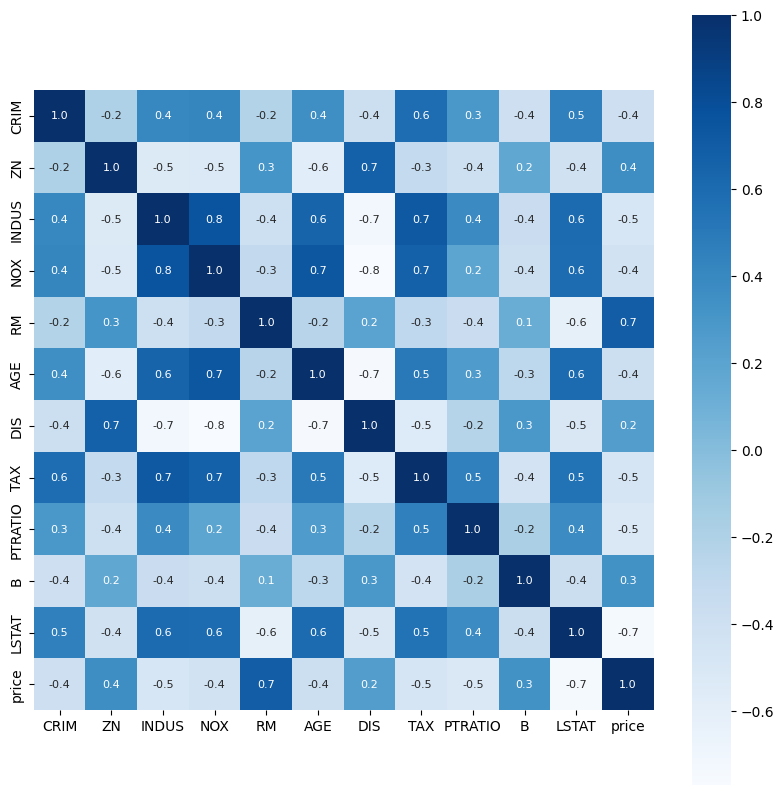

In [19]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and Target

In [20]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [21]:
print(X)
print(Y)

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

Splitting the data into Training data and Test data

Model Training

XGBoost Regressor

In [56]:
# Select the columns to convert to 'category' data type
columns_to_convert = ['CHAS', 'RAD']

encoder = OrdinalEncoder()
encoder.fit(house_price_dataframe[columns_to_convert])
encoded_values = encoder.transform(house_price_dataframe[columns_to_convert])

# Replace the original columns with the encoded values
for i, col in enumerate(columns_to_convert):
    house_price_dataframe[col] = encoded_values[:, i].astype(int)

X = house_price_dataframe.drop('price', axis=1) 
Y = house_price_dataframe['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

# Create the model
model = XGBRegressor()
model.fit(X, Y)
training_data_prediction = model.predict(X_train)


(506, 13) (404, 13) (102, 13)
        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
8    0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9    0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10   0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11   0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12   0.09378  12.5   7.87     0  0.524  5.889   39.0  5.4509    5  311.0   
..       ...   ...    ...   ...    ...    ...    ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593   69.1  2.4786    0  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120   76.7  2.2875    0  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976   91.0  2.1675    0  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794   89.3  2.3889    0  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030   80.8  2.5050    0  273.0   

     PTRATIO       B  LSTAT  price  
8       15.2  386.63

Prediction on training data

In [48]:
print(training_data_prediction)

[23.148048  20.961945  20.111279  34.687637  13.924588  13.516431
 21.979107  15.208492  10.907367  22.691288  13.795855   5.650004
 29.812296  49.98209   34.85095   20.596922  23.371685  19.210016
 32.678646  19.662533  26.987242   8.384411  46.020058  21.67485
 27.024078  19.273476  19.31789   24.82172   22.686502  31.704481
 18.571903   8.695001  17.41838   23.691301  13.290102  10.509829
 12.611794  25.010231  19.69183   14.874775  24.214602  25.021431
 14.907731  17.0167    15.5839    12.728322  24.526342  15.034202
 50.005222  17.582771  21.172419  32.01162   15.603073  22.898827
 19.30661   18.775055  23.276966  37.220535  30.09778   33.146374
 20.978966  49.999004  13.420446   4.9994583 16.49666    8.408922
 28.63718   19.487257  20.623472  45.401123  39.81065   33.438396
 19.842789  33.406345  25.261883  49.99993   12.522386  17.443691
 18.605377  22.583336  50.001144  23.783249  23.328545  23.06901
 41.72117   16.135448  31.634634  36.103012   7.000324  20.367027
 19.961874  

In [49]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999864418159105
Mean Absolute Error :  0.0237329478311067


Visualizing the actual Prices and predicted prices

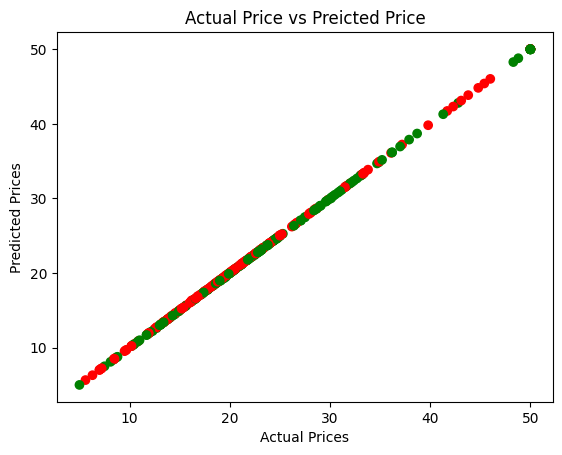

In [52]:
# plt.scatter(Y_train, training_data_prediction, c=Y_train, cmap='viridis')
plt.scatter(Y_train, 
            training_data_prediction, 
            c=['red' if pred > actual else 'green' 
               for pred, actual in zip(training_data_prediction, Y_train)])

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data 

In [53]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [54]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999878145269416
Mean Absolute Error :  0.0222795421001957


In [64]:
# input_data =first_row_values = house_price_dataframe.iloc[8].values.tolist()

input_data = [0.21124, 12.5, 7.87, 0.0, 0.524, 5.631,
              100.0, 6.0821, 5.0, 311.0, 15.2, 386.63, 29.93]
input_data_array = np.asarray(input_data)
input_data_reshaped = input_data_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

actual_price = first_row_values = house_price_dataframe.iloc[8].values.tolist()[-1]
print(actual_price)


[16.510056]
16.5
